# 1. Importing Dependencies and Data

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [4]:
# Set up for scaling later on
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [11]:
import tensorflow_datasets as tfds
ds = tfds.load('fashion_mnist', split='train')

2024-02-04 12:57:57.153557: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

2024-02-04 12:58:03.730447: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shuffling /Users/ammaar/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5RCVJ6/fashion_mnist-train.tfrecord*…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /Users/ammaar/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5RCVJ6/fashion_mnist-test.tfrecord*.…

Dataset fashion_mnist downloaded and prepared to /Users/ammaar/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


# 2. Visualize Data and Building Data Pipeline

In [12]:
# Some data transformation
import numpy as np

In [13]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

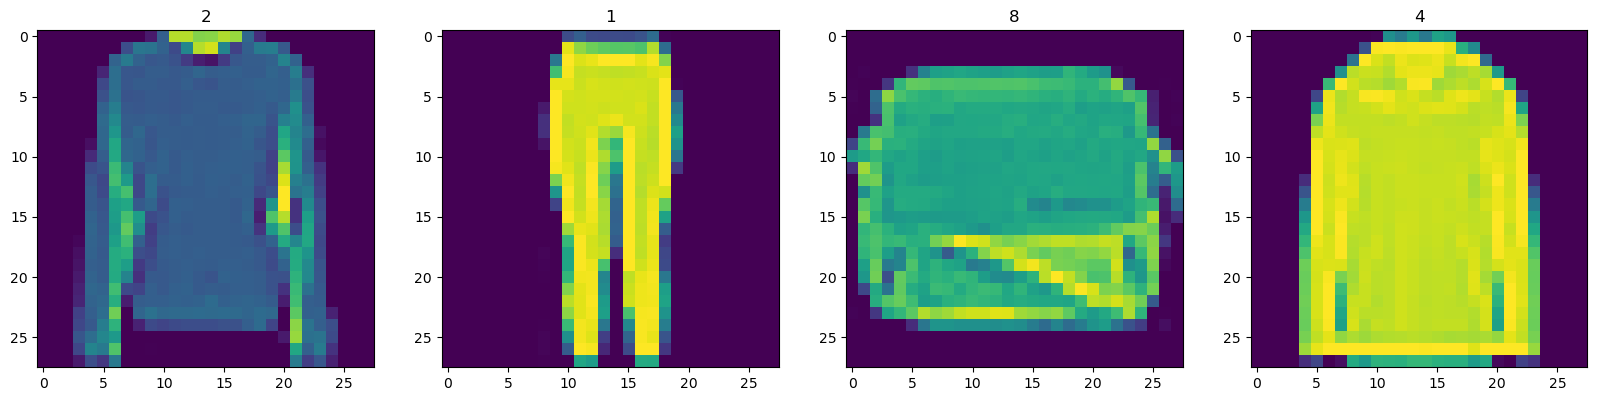

In [14]:
# Creating some subplots for 4 sample images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    batch = dataiterator.next() # Grab an image and label
    ax[idx].imshow(np.squeeze(batch['image'])) # Converting shape to 28x28 (squeeze)
    ax[idx].title.set_text(batch['label'])

In [15]:
# Scale and return images only (preprocessing)
def scale_images(data):
    image = data['image']
    return image / 255

In [16]:
# Reloading the dataset
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images) # Running the dataset through the scale_images preprocessing step
ds = ds.cache() # Cache the dataset for that batch
ds = ds.shuffle(60000) # Shuffle it up
ds = ds.batch(128) # Batch into 128 images per sample
ds = ds.prefetch(64) # Reduces the likelihood of bottlenecking

In [17]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Building Neural Network
- 3.1 Importing modelling components
- 3.2 Building the generator | Think of this as the 'artist'
- 3.3 Building the discriminator | Think of this as the 'art critic'

Importing modelling components